In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train_sc_df = pd.read_csv('../Warren/X_train_sc.csv')
y_train_enc_df = pd.read_csv('../Warren/y_train_enc.csv')
X_val_sc_df = pd.read_csv('../Warren/X_val_sc.csv')
y_val_enc_df = pd.read_csv('../Warren/y_val_enc.csv')

In [6]:
complete_train_df = pd.concat([X_train_sc_df, y_train_enc_df], axis=1)

In [7]:
complete_train_df

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,seniorcitizen,tenure,monthlycharges,totalcharges,totchg_per_tenure,monthly_div_tot,num_of_internet_services,num_of_services,customerid,churn
0,0,1,1,1,0,0,2,2,0,2,...,0,-0.017944,-0.107867,-0.183246,-0.209143,-0.438551,0.854371,0.531661,5061-PBXFW,0
1,0,1,0,1,2,1,2,0,0,2,...,0,-0.875263,1.056297,-0.468087,1.547428,-0.274448,0.854371,0.531661,3737-GCSPV,1
2,0,1,1,1,0,2,1,1,1,1,...,0,1.165973,-1.501185,-0.428393,-1.431795,-0.502593,-1.095781,-1.107179,1830-IPXVJ,0
3,0,0,0,1,0,1,0,0,0,0,...,0,-1.038562,0.174811,-0.781296,0.301796,-0.070922,-1.095781,-1.107179,5605-IYGFG,0
4,0,0,1,1,0,2,1,1,1,1,...,0,0.676076,-1.511220,-0.601398,-1.521564,-0.480899,-1.095781,-1.107179,2821-WARNZ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,1,1,1,1,0,0,0,0,0,0,...,0,0.716901,-0.663187,-0.020924,-0.663151,-0.484588,-1.095781,-1.107179,9702-AIUJO,0
3957,1,1,0,1,2,1,2,2,2,0,...,0,1.574220,1.504567,2.471672,1.531679,-0.506547,1.504422,1.624221,5945-AZYHT,0
3958,0,0,0,1,2,0,2,0,2,2,...,0,0.104530,0.713404,0.368814,0.808042,-0.457518,1.504422,1.624221,3594-UVONA,1
3959,0,1,1,1,0,0,2,2,0,0,...,0,-0.630315,0.332040,-0.470857,0.231365,-0.336813,1.504422,1.077941,7088-FBAWU,0


<AxesSubplot:xlabel='single_parent', ylabel='churn'>

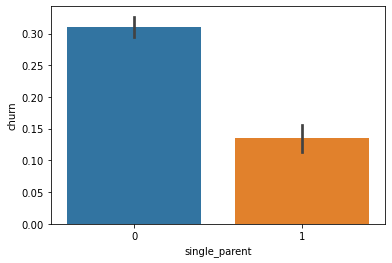

In [17]:
sns.barplot(x=complete_train_df['single_parent'], y=complete_train_df['churn'])

<AxesSubplot:xlabel='num_of_services', ylabel='churn'>

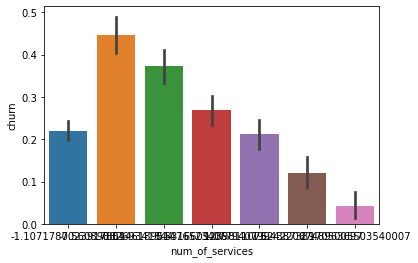

In [29]:
sns.barplot(x=complete_train_df['num_of_services'], y=complete_train_df['churn'])